In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_data= pd.read_csv("test_data.csv")
train_data= pd.read_csv("train_data.csv")

In [3]:
test_data

,Unnamed: 0,user_id,product_id,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order
0,0,158651,79,0.428999,2.147993,0.534449,15.483871,0.010753,1,0.500000
1,1,158651,210,0.459356,2.483361,0.597320,15.483871,0.010753,67,0.014706
2,2,158651,260,0.481936,2.741140,0.635188,15.483871,0.010753,14,0.066667
3,3,158651,283,0.341418,1.884328,0.469307,15.483871,0.021505,31,0.040816
4,4,158651,311,0.407092,2.257284,0.556990,15.483871,0.010753,14,0.066667
...,...,...,...,...,...,...,...,...,...,...
4833287,4833287,59135,47333,0.271937,1.691573,0.408834,7.357143,0.035714,16,0.058824
4833288,4833288,59135,47345,0.063232,1.072600,0.067686,7.357143,0.035714,15,0.062500
4833289,4833289,59135,47714,0.211970,1.386534,0.278777,7.357143,0.035714,18,0.052632
4833290,4833290,59135,47766,0.641299,4.133993,0.758103,7.357143,0.142857,6,0.200000


In [4]:
test_data.drop(["Unnamed: 0"],axis=1,inplace=True)
train_data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
train_data.head()

,user_id,product_id,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,recorded
0,1,196,0.582500,4.473875,0.776480,5.9,1.0,0,1.000000,1.0
1,1,10258,0.552962,3.493716,0.713772,5.9,0.9,0,1.000000,1.0
2,1,10326,0.521581,2.873635,0.652009,5.9,0.1,5,0.166667,0.0
3,1,12427,0.529482,3.857058,0.740735,5.9,1.0,0,1.000000,0.0
4,1,13032,0.479782,2.916796,0.657158,5.9,0.3,0,0.333333,1.0


In [6]:
train_sample=train_data.sample(frac=0.1, random_state=None,axis=0)
train_sample.reset_index(drop=True, inplace=True)
train_sample

,user_id,product_id,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,recorded
0,96043,49070,0.377551,1.938776,0.484211,20.466667,0.111111,37,0.111111,0.0
1,44250,37710,0.608762,4.597333,0.782483,15.000000,0.064103,14,0.106383,0.0
2,50881,38881,0.507653,2.897959,0.654930,14.000000,0.800000,1,0.800000,1.0
3,162301,9597,0.418239,2.171908,0.539575,8.000000,0.142857,1,0.500000,0.0
4,125284,11034,0.507937,2.579365,0.612308,10.333333,0.333333,0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
1330790,157476,26165,0.556278,4.346049,0.769906,15.156863,0.117647,1,0.500000,1.0
1330791,142549,16070,0.500000,3.114865,0.678959,19.136364,0.136364,11,0.157895,0.0
1330792,52285,21137,0.648068,4.498504,0.777704,8.900000,0.200000,7,0.200000,1.0
1330793,45029,17429,0.541648,3.432962,0.708706,9.466667,0.033333,24,0.040000,0.0


In [7]:
train_sample["recorded"].sum()

83191.0

In [8]:
len(train_sample)

1330795

In [9]:
import random


index=list(range(len(train_sample)))
reindex=random.sample(index, len(train_sample))

In [10]:
train_sample.reindex(reindex).duplicated().sum()

0

In [11]:
train_reindex=train_sample.reindex(reindex)
train_reindex.reset_index(drop=True, inplace=True)
train_reindex

,user_id,product_id,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,recorded
0,191790,43765,0.310838,1.709611,0.415072,11.769231,0.153846,5,0.200000,0.0
1,184280,21333,0.433645,2.321703,0.569282,16.863636,0.045455,4,0.200000,0.0
2,165844,40351,0.396226,2.867925,0.651316,7.500000,0.166667,5,0.166667,0.0
3,83517,9366,0.377985,1.969423,0.492237,7.941176,0.058824,6,0.142857,0.0
4,199470,45104,0.427970,2.361634,0.576564,4.659091,0.136364,4,0.272727,0.0
...,...,...,...,...,...,...,...,...,...,...
1330790,10779,38647,0.388759,2.437354,0.589719,14.555556,0.111111,8,0.111111,0.0
1330791,37664,49157,0.349398,2.021687,0.505364,5.687500,0.125000,0,0.285714,0.0
1330792,145284,42230,0.291892,1.935135,0.483240,12.666667,0.333333,1,0.500000,0.0
1330793,63162,37646,0.564763,3.747222,0.733136,12.617647,0.088235,3,0.107143,0.0


In [12]:
def cross_validation_split(X_train, folds):
        dataset_split = []
        fold_size = int(X_train.shape[0] / folds) #number of rows in each fold
        ini_index=[0] #start from index 0
        remains= fold_size % folds 
        
        
        # for loop to save each fold
        for i in range(1,remains):
            ini_index.append(i*fold_size+1)

        for j in range (remains, folds+1):
            ini_index.append(j*fold_size+remains)

            # save the fold     
        for n in range(len(ini_index)-1):
            dataset_split.append([ini_index[n], ini_index[n+1]])
            
        return dataset_split

In [13]:
cross_validation_split(train_reindex, 5)

[[0, 266160],
 [266160, 532319],
 [532319, 798478],
 [798478, 1064640],
 [1064640, 1330799]]

In [14]:
X=train_reindex.iloc[:,2:-1]
y=train_reindex.iloc[:,-1]

In [15]:
def xgb_cv(params, X_train, y_train, num_boost_round,early_stopping_rounds,k):
    index=cross_validation_split(X_train,k)
    
    # train each sub-combination1111a
    auc = []
    score=[]
    br=[]
    for i in range(k):
        
        cv_xtest = X_train.iloc[index[i][0]:index[i][1],:]
        cv_ytest = y_train.iloc[index[i][0]:index[i][1],]
        
        # drop the test sub-set
        cv_xtrain = X_train.drop(X_train.index[index[i][0]:index[i][1]])
        cv_ytrain = y_train.drop(X_train.index[index[i][0]:index[i][1]])
        
        data_dmatrix_train = xgb.DMatrix(data=cv_xtrain,label=cv_ytrain)
        data_dmatrix_test = xgb.DMatrix(data=cv_xtest,label=cv_ytest)
        
        xg_reg = xgb.train(params=params, dtrain=data_dmatrix_train,num_boost_round = num_boost_round,
                              early_stopping_rounds = early_stopping_rounds,verbose_eval=30,
                           evals=[(data_dmatrix_train,'train'),(data_dmatrix_test, 'test')])
#         model.fit(cv_xtrain, cv_ytrain.values.reshape(-1))
        
        y_pred=xg_reg.predict(data_dmatrix_test)
        # calculate the auc as the evaluation metric
#         fpr, tpr, threshold = roc_curve(cv_ytest, model.predict_proba(cv_xtest)[:,1])
#         [fpr, tpr, thr]= roc_curve(cv_ytest,y_pred)
#         auc_roc = metrics.auc(fpr, tpr)
#         auc.append(auc_roc)
        best_round = xg_reg.best_iteration
        value = xg_reg.best_score
        score.append(value)
        br.append(best_round)    
    return np.mean(score),np.mean(br)

In [16]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10,'eval_metric' : 'auc'}


In [17]:
import xgboost as xgb
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc,confusion_matrix, accuracy_score

In [18]:
[score,best_round]=xgb_cv(params, X, y,100,10, 5)

[0]	train-auc:0.77470	test-auc:0.76984
[30]	train-auc:0.80651	test-auc:0.80137
[38]	train-auc:0.80720	test-auc:0.80196
[0]	train-auc:0.77318	test-auc:0.77587
[26]	train-auc:0.80475	test-auc:0.80723
[0]	train-auc:0.77354	test-auc:0.77670
[30]	train-auc:0.80517	test-auc:0.80695
[60]	train-auc:0.80805	test-auc:0.80942
[90]	train-auc:0.80918	test-auc:0.81027
[99]	train-auc:0.80943	test-auc:0.81047
[0]	train-auc:0.77461	test-auc:0.77286
[30]	train-auc:0.80611	test-auc:0.80315
[37]	train-auc:0.80646	test-auc:0.80333
[0]	train-auc:0.77561	test-auc:0.77539
[12]	train-auc:0.80417	test-auc:0.80334


In [19]:
score,best_round

(0.8056300000000001, 34.6)

In [37]:
param_grid = {'colsample_bytree': [ 0.3,0.5],
              'learning_rate': [0.1,0.2],
              'max_depth': [ 5, 10],
              'alpha': [5, 10],
              'num_boost_round':[100,200],
              'early_stopping_rounds':[10,20]
             }

In [38]:
import itertools as it
parameters = it.product(*(param_grid[title] for title in list(param_grid)))
print(list(param_grid))

['colsample_bytree', 'learning_rate', 'max_depth', 'alpha', 'num_boost_round', 'early_stopping_rounds']


In [40]:
score_average=[]
best_round_average=[]
optimal_param=[]
for i in list(parameters):
    params = {"objective":"binary:logistic",'colsample_bytree': i[0],'learning_rate': i[1],
                'max_depth': i[2], 'alpha': i[3],'eval_metric' : 'auc'}
#     rf = RandomForestClassifier(n_estimators = i[0], criterion=i[1], max_depth = i[2], max_features = i[3])

    [score,best_round]=  xgb_cv(params, X, y,i[4],i[5], 5)
    score_average.append(score)
    best_round_average.append(best_round)
    optimal_param.append(i)

[0]	train-auc:0.77412	test-auc:0.77342
[30]	train-auc:0.80571	test-auc:0.80465
[38]	train-auc:0.80641	test-auc:0.80520
[0]	train-auc:0.77412	test-auc:0.77418
[30]	train-auc:0.80571	test-auc:0.80533
[60]	train-auc:0.80854	test-auc:0.80751
[90]	train-auc:0.80966	test-auc:0.80839
[99]	train-auc:0.80990	test-auc:0.80859
[0]	train-auc:0.77394	test-auc:0.77401
[30]	train-auc:0.80583	test-auc:0.80526
[38]	train-auc:0.80655	test-auc:0.80573
[0]	train-auc:0.77404	test-auc:0.77317
[26]	train-auc:0.80553	test-auc:0.80342
[0]	train-auc:0.77399	test-auc:0.77477
[30]	train-auc:0.80574	test-auc:0.80408
[38]	train-auc:0.80642	test-auc:0.80458
[0]	train-auc:0.77412	test-auc:0.77342
[30]	train-auc:0.80571	test-auc:0.80465
[60]	train-auc:0.80860	test-auc:0.80702
[90]	train-auc:0.80986	test-auc:0.80818
[99]	train-auc:0.81013	test-auc:0.80837
[0]	train-auc:0.77412	test-auc:0.77418
[30]	train-auc:0.80571	test-auc:0.80533
[60]	train-auc:0.80854	test-auc:0.80751
[90]	train-auc:0.80966	test-auc:0.80839
[99]	tr

[99]	train-auc:0.81974	test-auc:0.81002
[0]	train-auc:0.77478	test-auc:0.77472
[30]	train-auc:0.80919	test-auc:0.80614
[38]	train-auc:0.81091	test-auc:0.80658
[0]	train-auc:0.77487	test-auc:0.77393
[30]	train-auc:0.80928	test-auc:0.80476
[60]	train-auc:0.81548	test-auc:0.80750
[90]	train-auc:0.81888	test-auc:0.80819
[99]	train-auc:0.81967	test-auc:0.80827
[0]	train-auc:0.77465	test-auc:0.77524
[30]	train-auc:0.80912	test-auc:0.80524
[38]	train-auc:0.81075	test-auc:0.80569
[0]	train-auc:0.77487	test-auc:0.77413
[30]	train-auc:0.80908	test-auc:0.80568
[60]	train-auc:0.81571	test-auc:0.80860
[90]	train-auc:0.81945	test-auc:0.80954
[99]	train-auc:0.82034	test-auc:0.80963
[0]	train-auc:0.77479	test-auc:0.77457
[30]	train-auc:0.80900	test-auc:0.80647
[60]	train-auc:0.81551	test-auc:0.80914
[90]	train-auc:0.81892	test-auc:0.80993
[99]	train-auc:0.81974	test-auc:0.81002
[0]	train-auc:0.77478	test-auc:0.77472
[30]	train-auc:0.80919	test-auc:0.80614
[60]	train-auc:0.81594	test-auc:0.80835
[90]	t

[99]	train-auc:0.81348	test-auc:0.81014
[0]	train-auc:0.77412	test-auc:0.77418
[30]	train-auc:0.80851	test-auc:0.80751
[60]	train-auc:0.81092	test-auc:0.80919
[90]	train-auc:0.81280	test-auc:0.81002
[99]	train-auc:0.81335	test-auc:0.81014
[0]	train-auc:0.77394	test-auc:0.77401
[30]	train-auc:0.80864	test-auc:0.80716
[60]	train-auc:0.81113	test-auc:0.80849
[90]	train-auc:0.81338	test-auc:0.80938
[99]	train-auc:0.81398	test-auc:0.80959
[0]	train-auc:0.77404	test-auc:0.77317
[30]	train-auc:0.80872	test-auc:0.80621
[60]	train-auc:0.81070	test-auc:0.80727
[90]	train-auc:0.81281	test-auc:0.80784
[99]	train-auc:0.81331	test-auc:0.80805
[0]	train-auc:0.77399	test-auc:0.77477
[30]	train-auc:0.80858	test-auc:0.80666
[60]	train-auc:0.81080	test-auc:0.80833
[90]	train-auc:0.81274	test-auc:0.80945
[99]	train-auc:0.81316	test-auc:0.80958
[0]	train-auc:0.77412	test-auc:0.77342
[30]	train-auc:0.80862	test-auc:0.80723
[60]	train-auc:0.81098	test-auc:0.80891
[90]	train-auc:0.81299	test-auc:0.80999
[99]	

[199]	train-auc:0.81557	test-auc:0.81044
[0]	train-auc:0.77383	test-auc:0.77309
[30]	train-auc:0.80837	test-auc:0.80719
[60]	train-auc:0.81072	test-auc:0.80877
[90]	train-auc:0.81249	test-auc:0.80986
[120]	train-auc:0.81364	test-auc:0.81030
[150]	train-auc:0.81457	test-auc:0.81057
[180]	train-auc:0.81526	test-auc:0.81069
[199]	train-auc:0.81579	test-auc:0.81079
[0]	train-auc:0.77369	test-auc:0.77370
[30]	train-auc:0.80837	test-auc:0.80752
[60]	train-auc:0.81028	test-auc:0.80904
[90]	train-auc:0.81220	test-auc:0.81002
[120]	train-auc:0.81345	test-auc:0.81042
[150]	train-auc:0.81427	test-auc:0.81078
[180]	train-auc:0.81508	test-auc:0.81099
[199]	train-auc:0.81547	test-auc:0.81109
[0]	train-auc:0.77394	test-auc:0.77395
[30]	train-auc:0.80852	test-auc:0.80713
[60]	train-auc:0.81086	test-auc:0.80845
[90]	train-auc:0.81273	test-auc:0.80929
[120]	train-auc:0.81392	test-auc:0.80975
[150]	train-auc:0.81487	test-auc:0.81006
[180]	train-auc:0.81560	test-auc:0.81013
[199]	train-auc:0.81600	test-au

[120]	train-auc:0.82471	test-auc:0.81018
[126]	train-auc:0.82543	test-auc:0.81015
[0]	train-auc:0.77429	test-auc:0.77419
[30]	train-auc:0.81292	test-auc:0.80828
[60]	train-auc:0.81769	test-auc:0.80907
[90]	train-auc:0.82163	test-auc:0.80920
[120]	train-auc:0.82491	test-auc:0.80930
[128]	train-auc:0.82555	test-auc:0.80918
[0]	train-auc:0.77411	test-auc:0.77341
[30]	train-auc:0.81281	test-auc:0.80723
[60]	train-auc:0.81740	test-auc:0.80805
[90]	train-auc:0.82134	test-auc:0.80825
[120]	train-auc:0.82460	test-auc:0.80821
[126]	train-auc:0.82527	test-auc:0.80812
[0]	train-auc:0.77408	test-auc:0.77489
[30]	train-auc:0.81266	test-auc:0.80803
[60]	train-auc:0.81681	test-auc:0.80966
[90]	train-auc:0.82114	test-auc:0.80989
[120]	train-auc:0.82451	test-auc:0.80983
[125]	train-auc:0.82495	test-auc:0.80978
[0]	train-auc:0.78252	test-auc:0.78200
[30]	train-auc:0.80719	test-auc:0.80602
[34]	train-auc:0.80698	test-auc:0.80558
[0]	train-auc:0.78240	test-auc:0.78267
[30]	train-auc:0.80724	test-auc:0.806

[150]	train-auc:0.81335	test-auc:0.81048
[180]	train-auc:0.81388	test-auc:0.81072
[199]	train-auc:0.81435	test-auc:0.81083
[0]	train-auc:0.78226	test-auc:0.78177
[30]	train-auc:0.80727	test-auc:0.80527
[60]	train-auc:0.81020	test-auc:0.80760
[90]	train-auc:0.81116	test-auc:0.80834
[120]	train-auc:0.81204	test-auc:0.80882
[150]	train-auc:0.81288	test-auc:0.80929
[180]	train-auc:0.81357	test-auc:0.80949
[199]	train-auc:0.81391	test-auc:0.80954
[0]	train-auc:0.78206	test-auc:0.78240
[30]	train-auc:0.80726	test-auc:0.80532
[60]	train-auc:0.81013	test-auc:0.80800
[90]	train-auc:0.81154	test-auc:0.80931
[120]	train-auc:0.81235	test-auc:0.80999
[150]	train-auc:0.81315	test-auc:0.81055
[180]	train-auc:0.81380	test-auc:0.81087
[199]	train-auc:0.81409	test-auc:0.81093
[0]	train-auc:0.78496	test-auc:0.78417
[30]	train-auc:0.81258	test-auc:0.80757
[60]	train-auc:0.82096	test-auc:0.81014
[90]	train-auc:0.82564	test-auc:0.81110
[99]	train-auc:0.82635	test-auc:0.81110
[0]	train-auc:0.78356	test-auc:0

[30]	train-auc:0.81051	test-auc:0.80683
[60]	train-auc:0.81638	test-auc:0.80985
[90]	train-auc:0.81926	test-auc:0.81112
[120]	train-auc:0.82137	test-auc:0.81152
[150]	train-auc:0.82383	test-auc:0.81166
[164]	train-auc:0.82452	test-auc:0.81165
[0]	train-auc:0.78252	test-auc:0.78200
[30]	train-auc:0.81034	test-auc:0.80860
[60]	train-auc:0.81281	test-auc:0.81017
[90]	train-auc:0.81465	test-auc:0.81093
[99]	train-auc:0.81503	test-auc:0.81102
[0]	train-auc:0.78240	test-auc:0.78267
[30]	train-auc:0.81035	test-auc:0.80886
[60]	train-auc:0.81290	test-auc:0.81048
[90]	train-auc:0.81442	test-auc:0.81121
[99]	train-auc:0.81473	test-auc:0.81134
[0]	train-auc:0.78258	test-auc:0.78214
[30]	train-auc:0.81032	test-auc:0.80852
[60]	train-auc:0.81307	test-auc:0.81004
[90]	train-auc:0.81498	test-auc:0.81073
[99]	train-auc:0.81533	test-auc:0.81073
[0]	train-auc:0.78250	test-auc:0.78194
[30]	train-auc:0.81062	test-auc:0.80769
[60]	train-auc:0.81287	test-auc:0.80887
[90]	train-auc:0.81450	test-auc:0.80919
[

[60]	train-auc:0.81238	test-auc:0.80981
[90]	train-auc:0.81382	test-auc:0.81061
[120]	train-auc:0.81494	test-auc:0.81097
[140]	train-auc:0.81556	test-auc:0.81105
[0]	train-auc:0.78220	test-auc:0.78159
[30]	train-auc:0.81020	test-auc:0.80856
[60]	train-auc:0.81237	test-auc:0.81028
[90]	train-auc:0.81392	test-auc:0.81106
[120]	train-auc:0.81481	test-auc:0.81126
[150]	train-auc:0.81592	test-auc:0.81160
[180]	train-auc:0.81682	test-auc:0.81171
[199]	train-auc:0.81729	test-auc:0.81174
[0]	train-auc:0.78204	test-auc:0.78226
[30]	train-auc:0.81025	test-auc:0.80882
[60]	train-auc:0.81245	test-auc:0.81051
[90]	train-auc:0.81391	test-auc:0.81117
[120]	train-auc:0.81511	test-auc:0.81132
[150]	train-auc:0.81608	test-auc:0.81160
[180]	train-auc:0.81692	test-auc:0.81166
[199]	train-auc:0.81749	test-auc:0.81181
[0]	train-auc:0.78224	test-auc:0.78177
[30]	train-auc:0.81016	test-auc:0.80835
[60]	train-auc:0.81256	test-auc:0.80996
[90]	train-auc:0.81415	test-auc:0.81045
[120]	train-auc:0.81523	test-auc:

In [41]:
Xgb_df=pd.DataFrame()
Xgb_df["score_average"]=score_average
Xgb_df["best_round_average"]=best_round_average
Xgb_df["optimal_param"]=optimal_param
Xgb_df.sort_values(by="score_average",ascending=False)

,score_average,best_round_average,optimal_param
51,0.811110,169.6,"(0.5, 0.2, 5, 5, 200, 20)"
55,0.811103,186.0,"(0.5, 0.2, 5, 10, 200, 20)"
47,0.811079,128.4,"(0.5, 0.1, 10, 10, 200, 20)"
50,0.810978,133.6,"(0.5, 0.2, 5, 5, 200, 10)"
43,0.810968,110.0,"(0.5, 0.1, 10, 5, 200, 20)"
...,...,...,...
36,0.806937,41.6,"(0.5, 0.1, 5, 10, 100, 10)"
2,0.806135,59.8,"(0.3, 0.1, 5, 5, 200, 10)"
0,0.805729,39.8,"(0.3, 0.1, 5, 5, 100, 10)"
6,0.805688,54.8,"(0.3, 0.1, 5, 10, 200, 10)"


In [50]:
test_data.iloc[:,2:]

,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order
0,0.428999,2.147993,0.534449,15.483871,0.010753,1,0.500000
1,0.459356,2.483361,0.597320,15.483871,0.010753,67,0.014706
2,0.481936,2.741140,0.635188,15.483871,0.010753,14,0.066667
3,0.341418,1.884328,0.469307,15.483871,0.021505,31,0.040816
4,0.407092,2.257284,0.556990,15.483871,0.010753,14,0.066667
...,...,...,...,...,...,...,...
4833287,0.271937,1.691573,0.408834,7.357143,0.035714,16,0.058824
4833288,0.063232,1.072600,0.067686,7.357143,0.035714,15,0.062500
4833289,0.211970,1.386534,0.278777,7.357143,0.035714,18,0.052632
4833290,0.641299,4.133993,0.758103,7.357143,0.142857,6,0.200000


In [20]:
dmatrix_train = xgb.DMatrix(data=X,label=y)
dmatrix_test = xgb.DMatrix(data=test_data.iloc[:,2:])
dmatrix_test

In [21]:
best_params = {"objective":"binary:logistic",'colsample_bytree': 0.5,'learning_rate': 0.2,
                'max_depth': 5, 'alpha': 5,'eval_metric' : 'auc'}
# xg_reg_best = xgb.train(params=params, dtrain=dmatrix_train,num_boost_round = 200, early_stopping_rounds = 20,verbose_eval=30,
#                            evals=[(dmatrix_train,'train'),(dmatrix_test, 'test')])
xg_reg_best = xgb.train(params=best_params, dtrain=dmatrix_train, num_boost_round=170)

In [22]:
y_pred_train=xg_reg_best.predict(dmatrix_train)
[fpr, tpr, thr]= roc_curve(y,y_pred_train)
metrics.auc(fpr, tpr)


0.8178589546252738

Text(0.5, 1.05, 'confusion matrix')

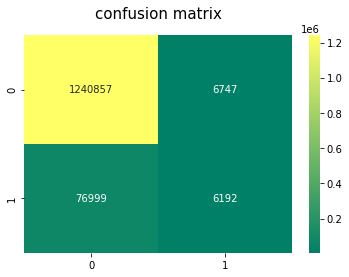

In [23]:
threshold=0.4
pred=[]
for i in range(len(y_pred_train)):
    if y_pred_train[i]>threshold:
        p=1
    else:
        p=0
    pred.append(p)
pred
# cm = confusion_matrix(Y_train,y_pred)
sns.heatmap(confusion_matrix(y,pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('confusion matrix', y=1.05, size=15)

No handles with labels found to put in legend.


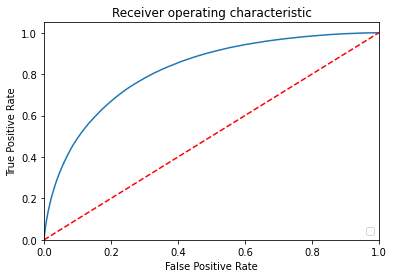

In [24]:

plt.figure()
# plt.plot(fpr, tpr, label='AUC value (area = %0.2f)' % auc(fpr, tpr))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:

y_pred=xg_reg_best.predict(dmatrix_test)

In [26]:
threshold=0.4
pred=[]
for i in range(len(y_pred)):
    if y_pred[i]>threshold:
        p=1
    else:
        p=0
    pred.append(p)

In [27]:
y_result=pred
test_data["y_pred"]=y_pred
test_data["reorder"]=y_result
test_data.head()

,user_id,product_id,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,y_pred,reorder
0,158651,79,0.428999,2.147993,0.534449,15.483871,0.010753,1,0.500000,0.035429,0
1,158651,210,0.459356,2.483361,0.597320,15.483871,0.010753,67,0.014706,0.002851,0
2,158651,260,0.481936,2.741140,0.635188,15.483871,0.010753,14,0.066667,0.008790,0
3,158651,283,0.341418,1.884328,0.469307,15.483871,0.021505,31,0.040816,0.005678,0
4,158651,311,0.407092,2.257284,0.556990,15.483871,0.010753,14,0.066667,0.005153,0


In [28]:
test_data["reorder"].sum()

46780

In [29]:
test_data.shape

(4833292, 11)

In [30]:
train_data["recorded"].sum()

828824.0

In [31]:
train_data.shape

(13307953, 10)

In [32]:
test_data.to_csv("test_data_pred.csv",index=True,header=True)
